<a href="https://colab.research.google.com/github/rs628/Python_basics/blob/main/MAT496_understanding_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Last Chatper:

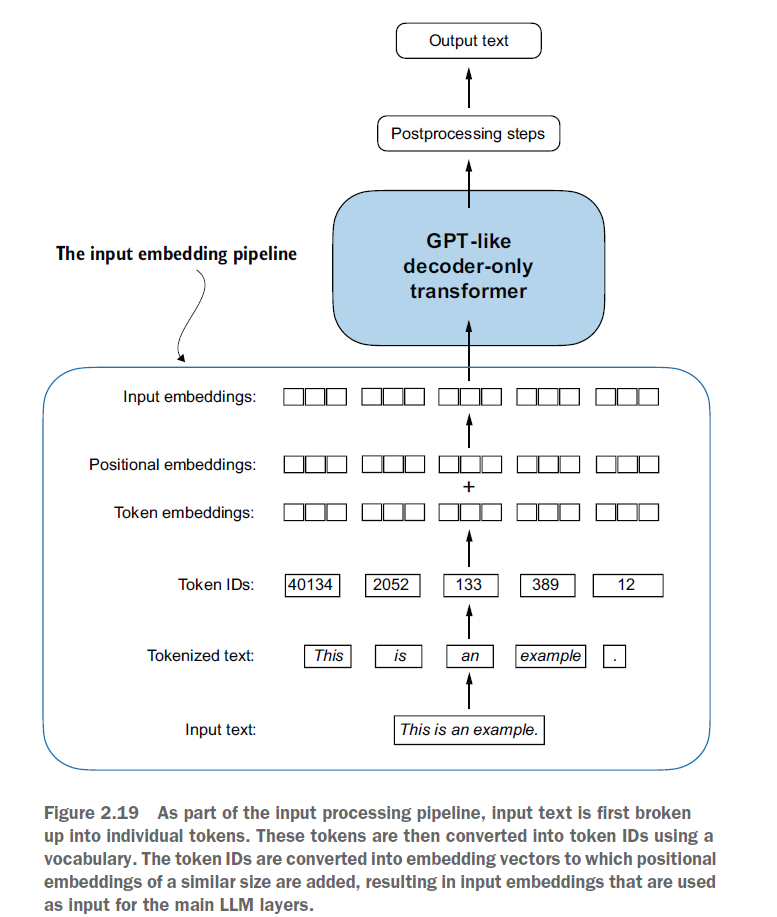

---

# This Chapter: We will understand Attention

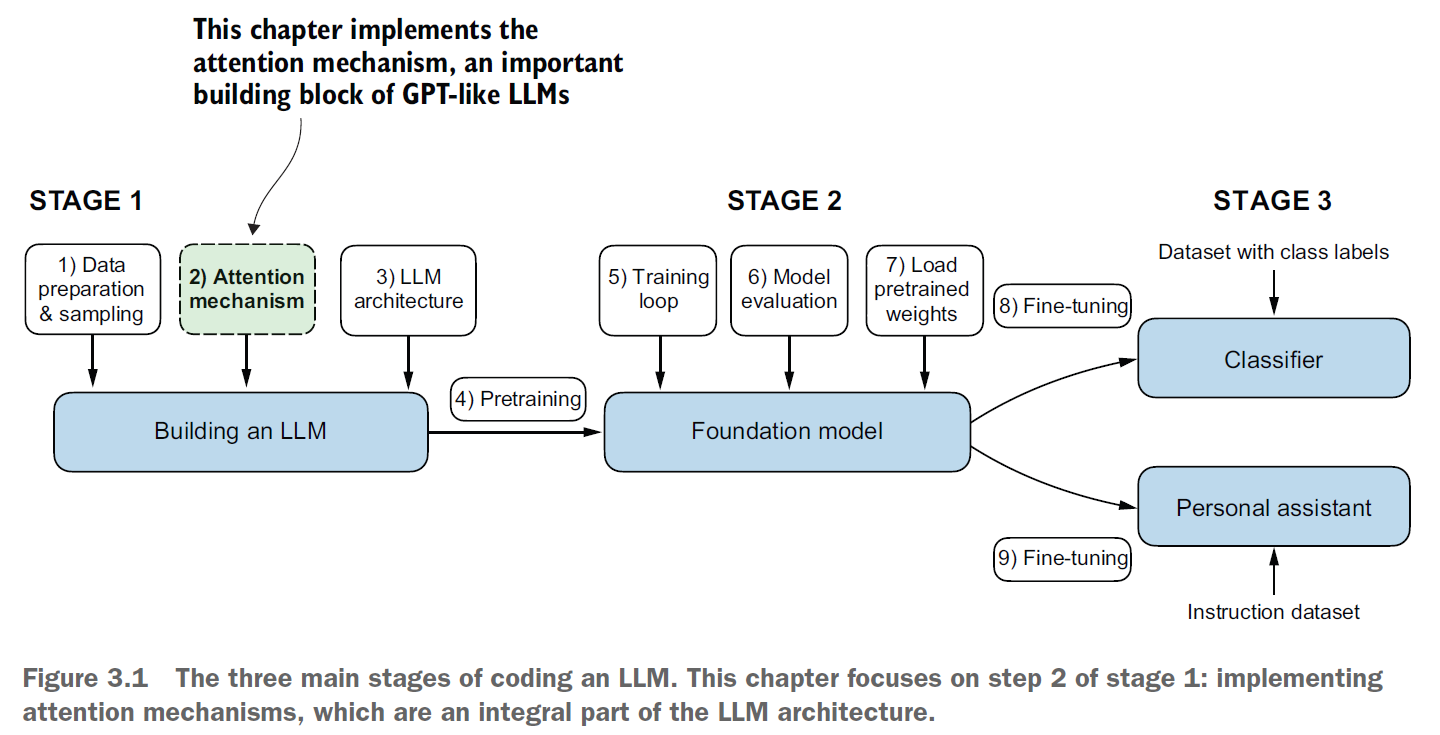

# Lets understand the pytorch `torch.nn.MultiheadAttention(embed_dim, num_heads)`

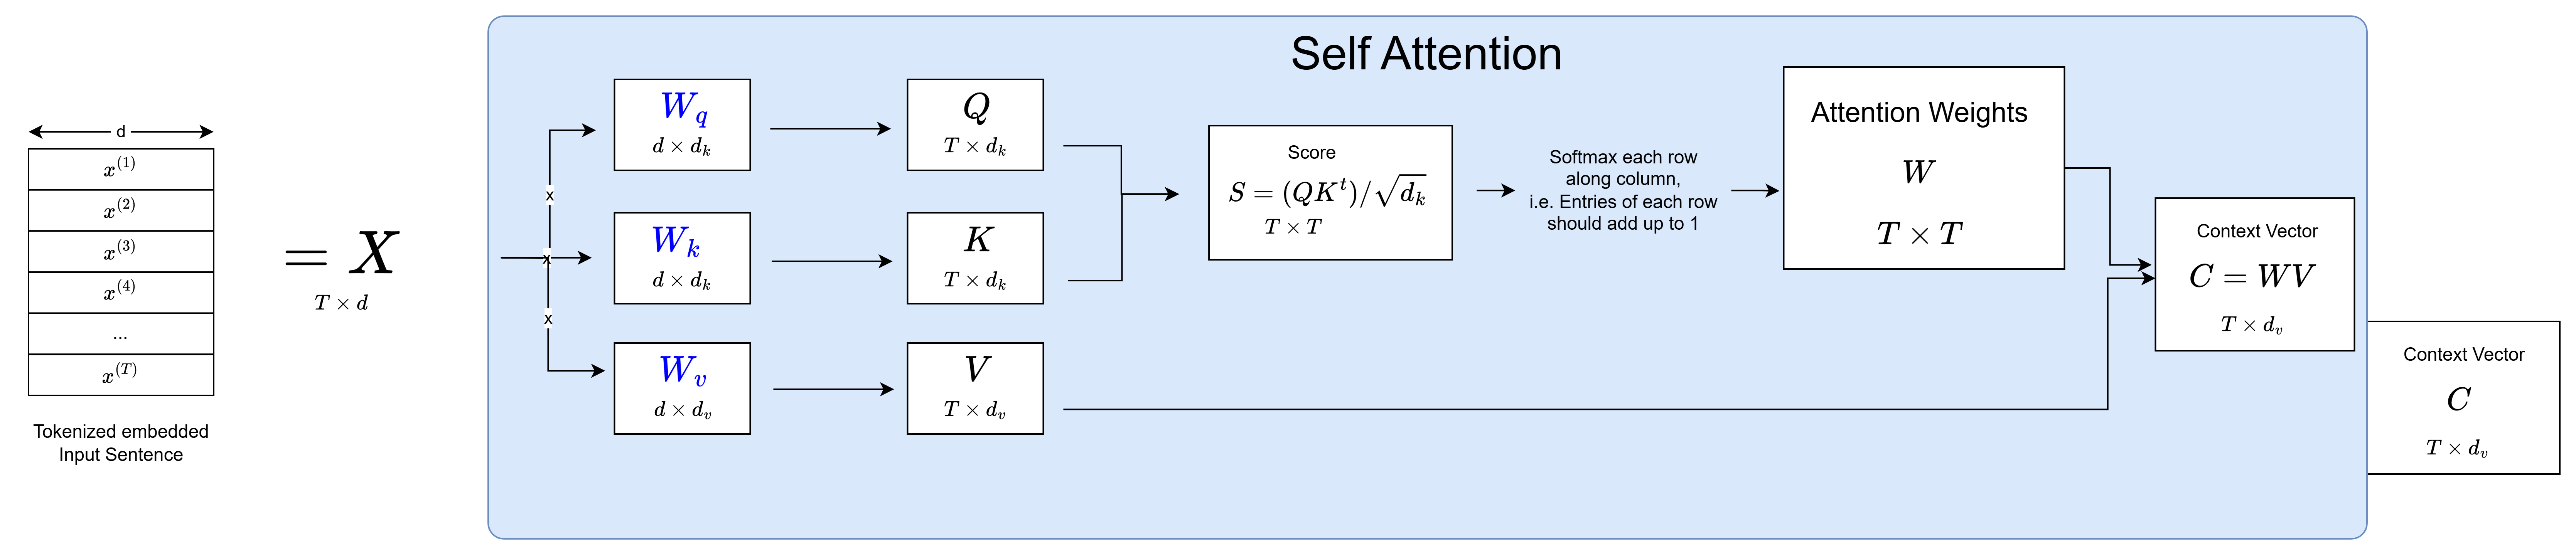


In [ ]:
import torch

d = 3 # word embedding dim
T = 10 # number of words
X = torch.rand((T,d))   # tokeninzed and embedded words
print(X.shape)

torch.Size([10, 3])


In [ ]:
dk = dv = embed_dim = 6
qLayer = torch.nn.Linear(d, embed_dim); Q = qLayer(X)
kLayer = torch.nn.Linear(d, embed_dim); K = kLayer(X)
vLayer = torch.nn.Linear(d, embed_dim); V = vLayer(X)


In [ ]:
# Create a self attention layer using pytorch built in module
num_heads = 1 # self attention
attentionLayer = torch.nn.MultiheadAttention(embed_dim, num_heads)

In [ ]:
attn_out, attn_weight = attentionLayer(query, key, value)

In [ ]:
attn_weight.shape

torch.Size([10, 10])

In [ ]:
# What are the unknowns in this self attention layer?

In [ ]:
# coding self attention: Semi Scratch

# model definition
class MyToyAttention_1(torch.nn.Module):
    def __init__(self, d, dk):
        super().__init__()
        self.qLayer = torch.nn.Linear(d, dk)
        self.kLayer = torch.nn.Linear(d, dk)
        self.vLayer = torch.nn.Linear(d, dk)
        self.attentionLayer = torch.nn.MultiheadAttention(dk, num_heads=1)

    def forward(self, x):
        Q = self.qLayer(X); K = self.kLayer(X); V = self.vLayer(X)
        attn_out, attn_weight = self.attentionLayer(Q,K,V)
        return attn_out, attn_weight

test = MyToyAttention_1(d,dk)

In [ ]:
# Self Attention from scratch

# coding self attention: Scratch

# model definition
class MyToyAttention_2(torch.nn.Module):
    def __init__(self, d, dk):
        super().__init__()
        self.qLayer = torch.nn.Linear(d, dk)
        self.kLayer = torch.nn.Linear(d, dk)
        self.vLayer = torch.nn.Linear(d, dk)

    def forward(self, x):
        Q = self.qLayer(X); K = self.kLayer(X); V = self.vLayer(X)
        score = Q @ K.T
        attn_weight = torch.softmax(score / K.shape[-1]**0.5, dim=-1)
        context_vector = attn_weight @ V
        return context_vector, attn_weight


myAttentionalLayer2 = MyToyAttention_2(d,dk)


In [ ]:
attn_out, attn_weight = myAttentionalLayer2(X)

In [ ]:
attn_weight.shape

torch.Size([10, 10])

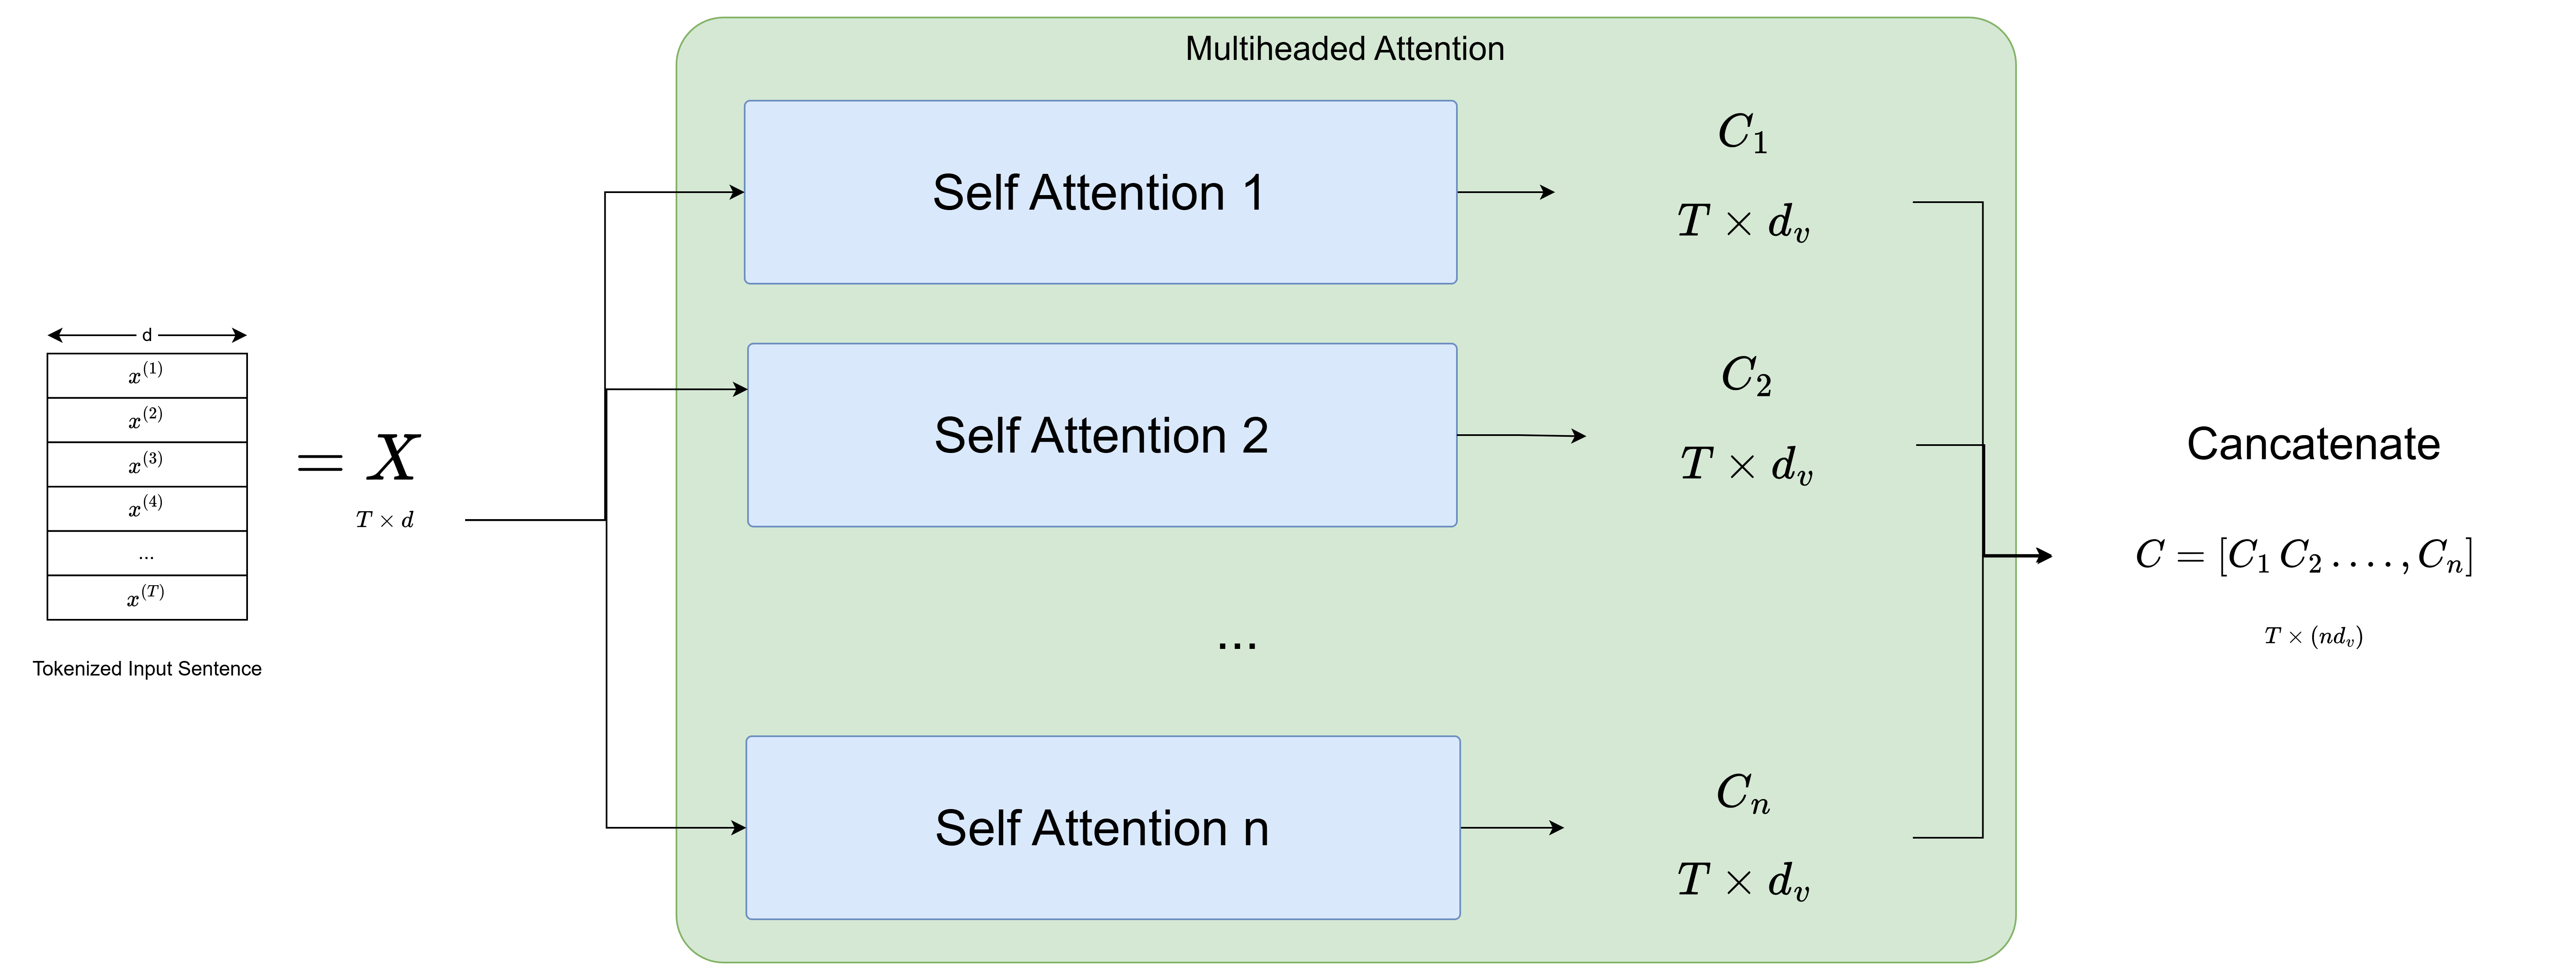

In [ ]:
# How many unknowns are there if we have 7 head attention?
# T = 10, d = 4, n = 7
# dk = dq = dv = 5

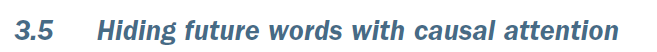

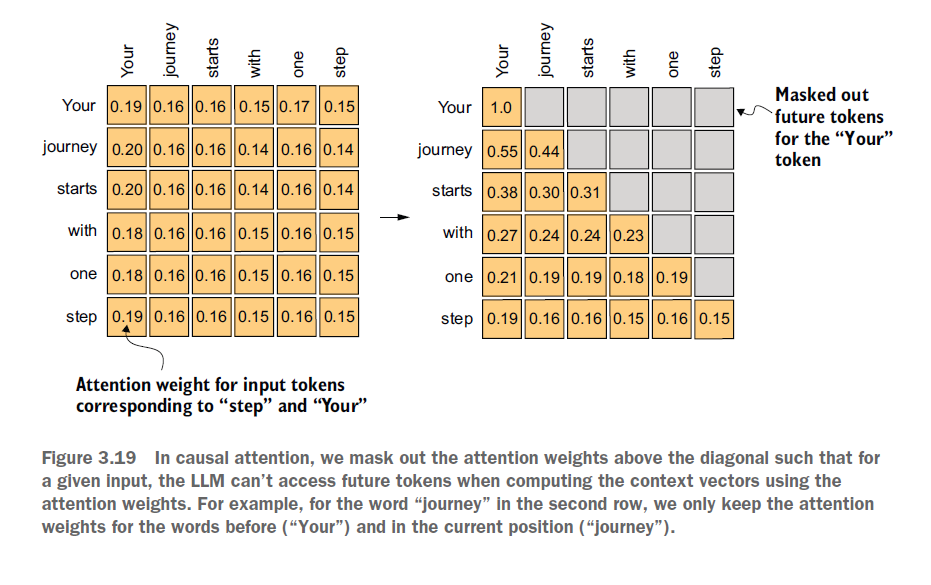

# Dropout introduced to reduce overfitting

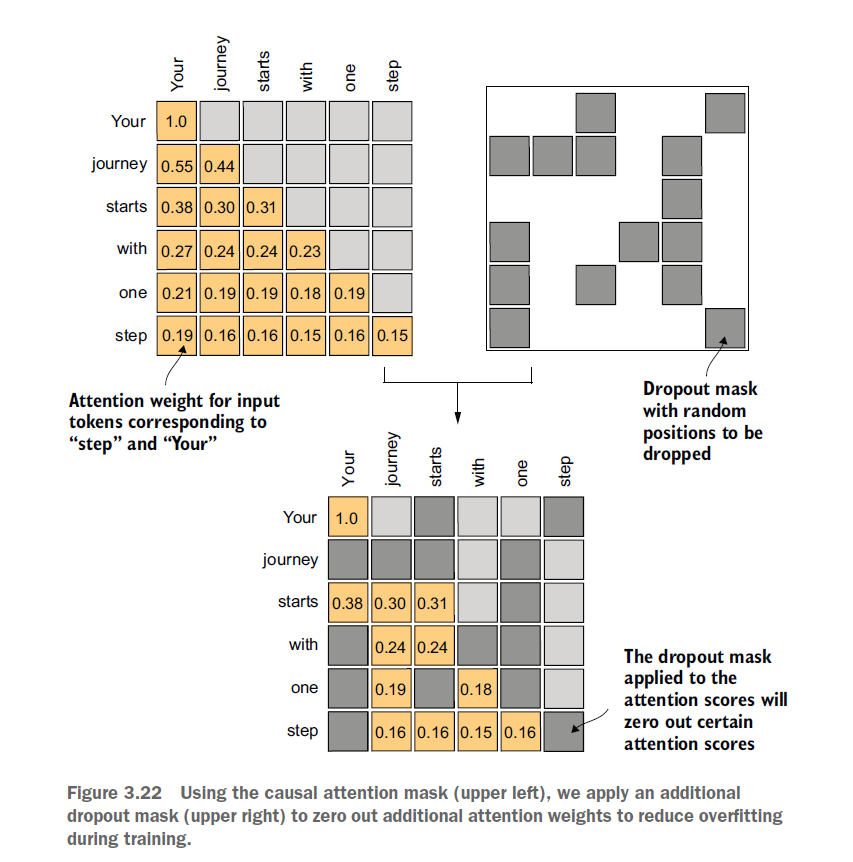